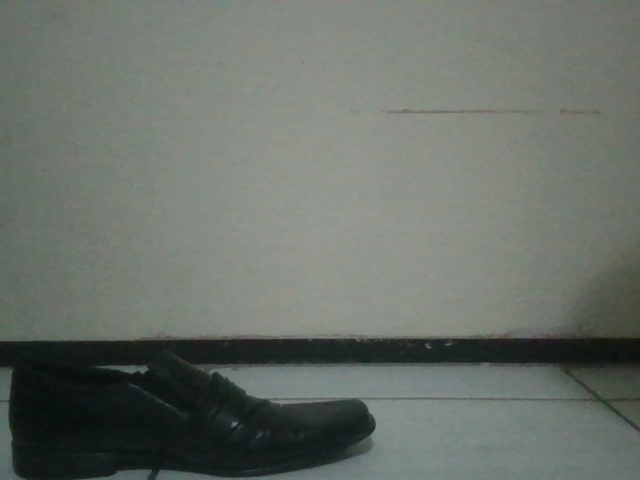

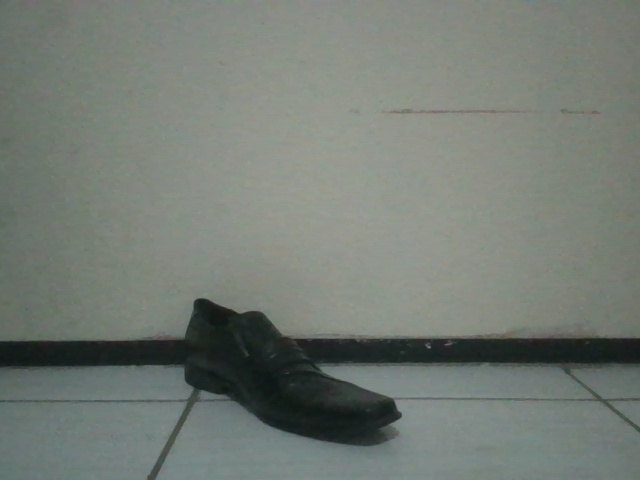

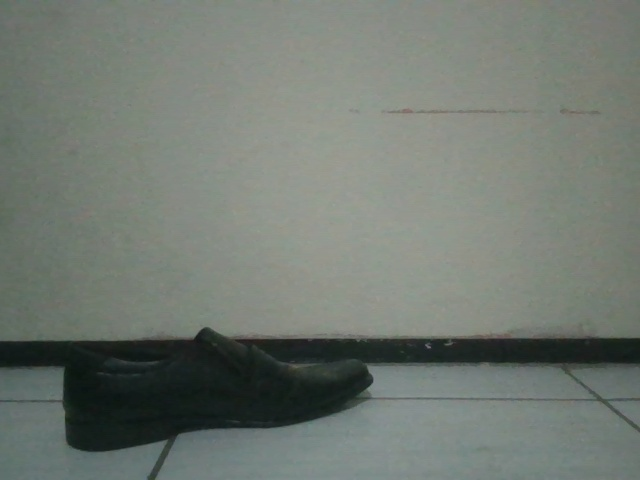

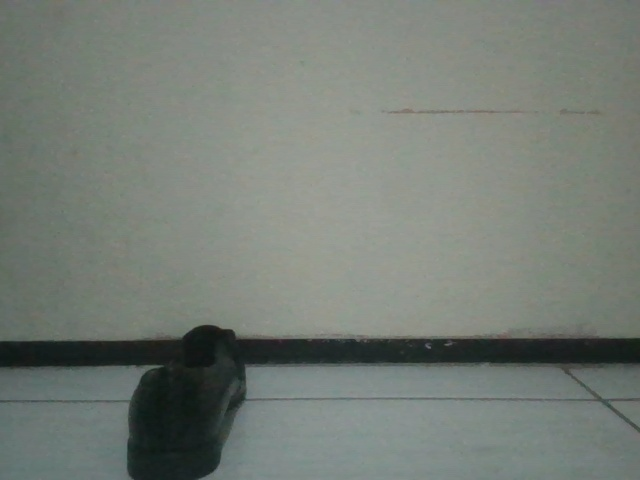

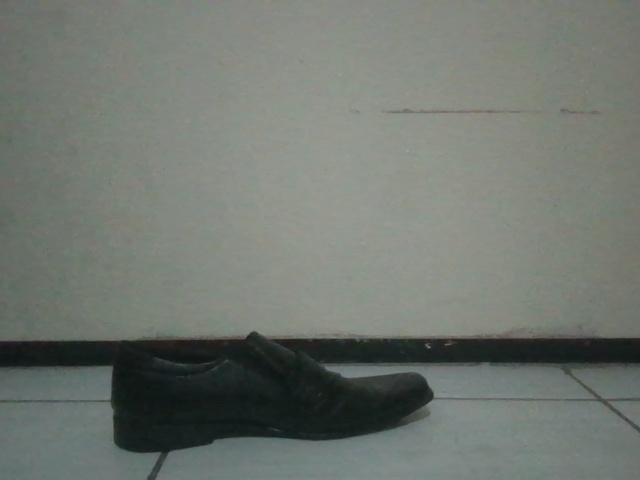

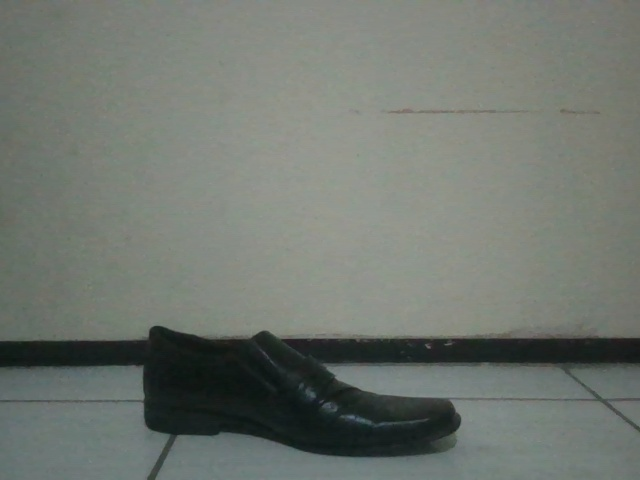

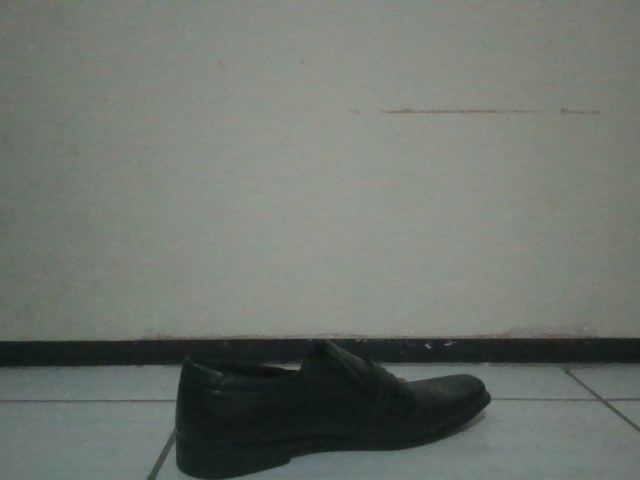

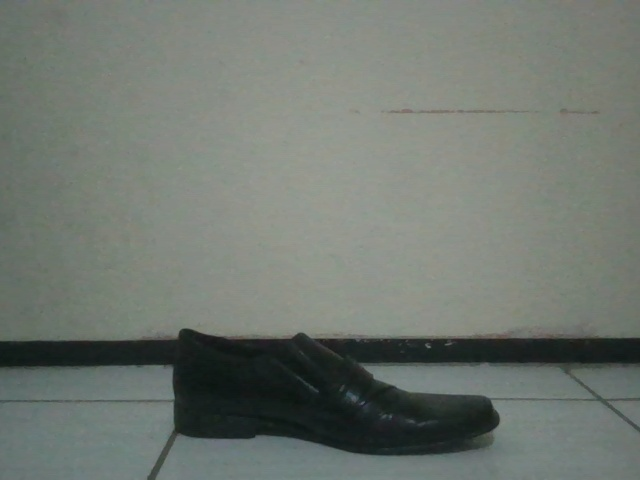

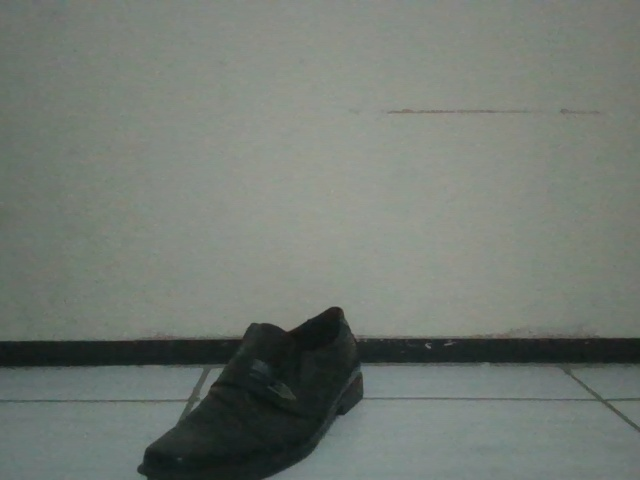

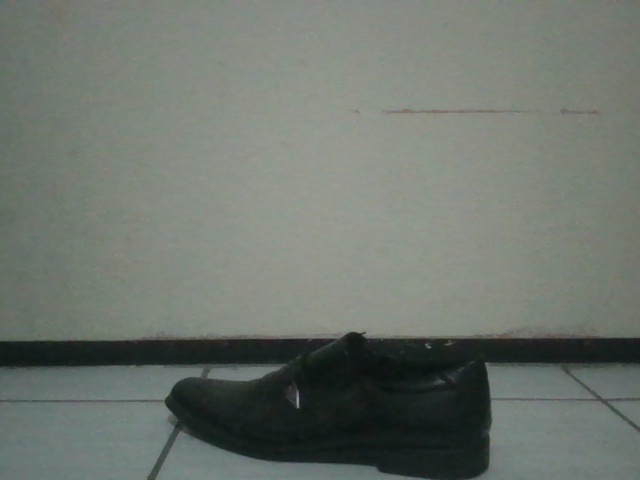

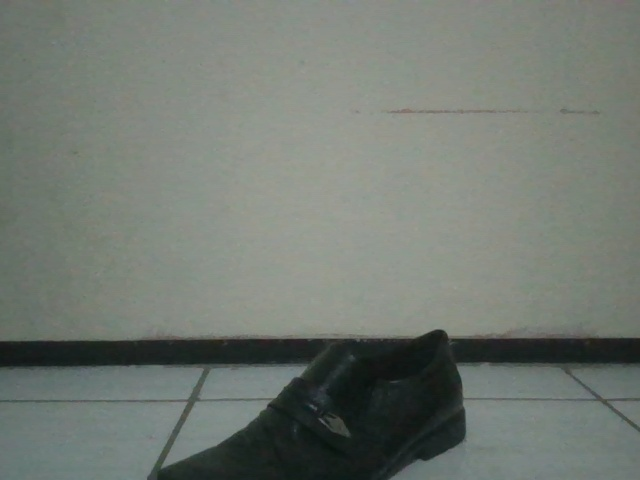

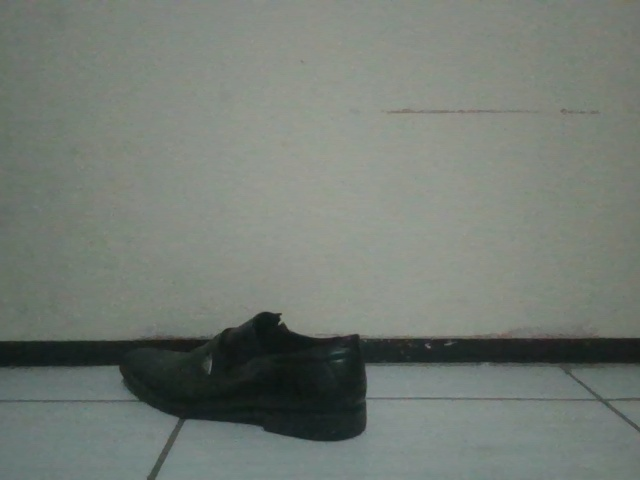

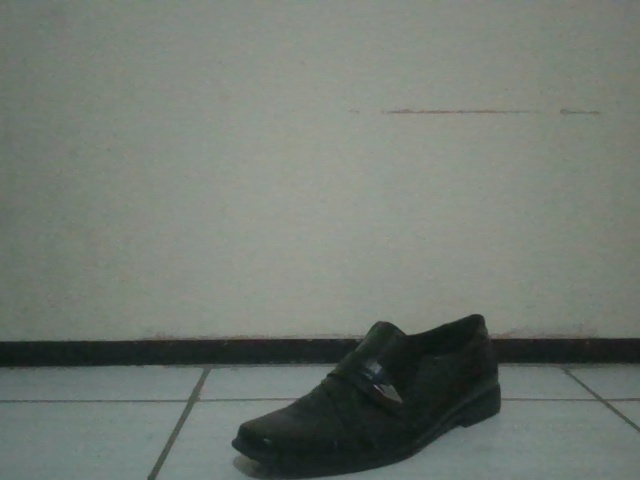

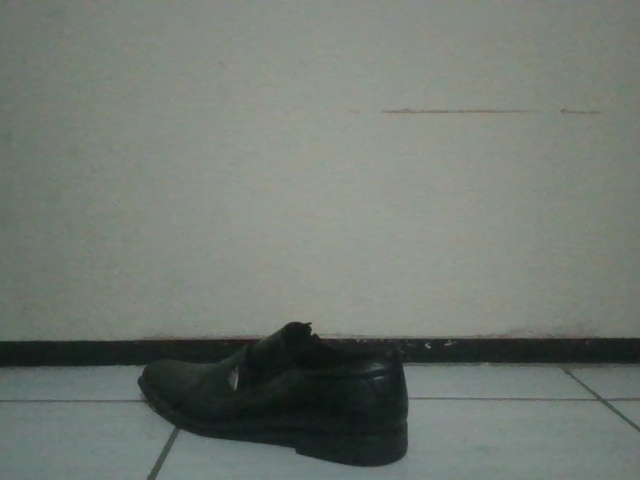

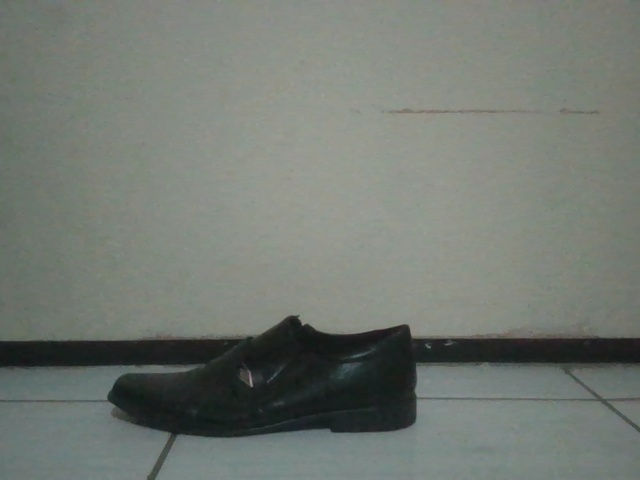

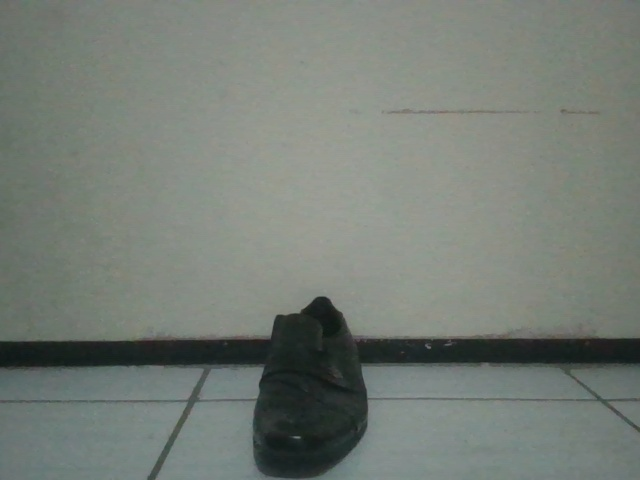

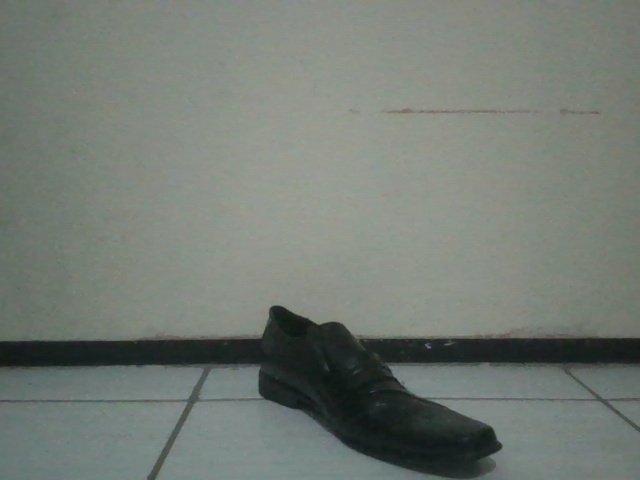

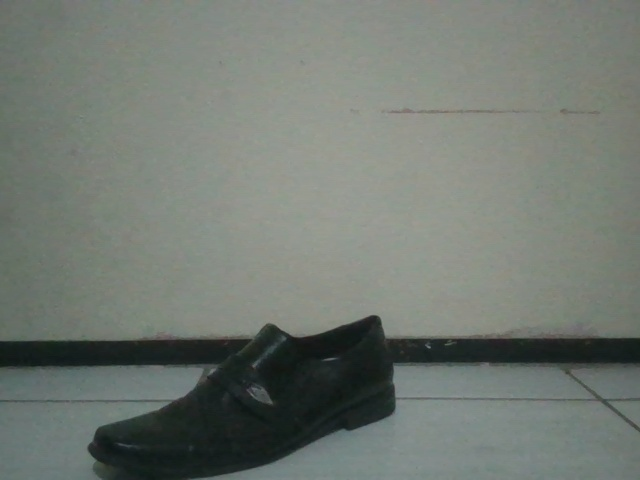

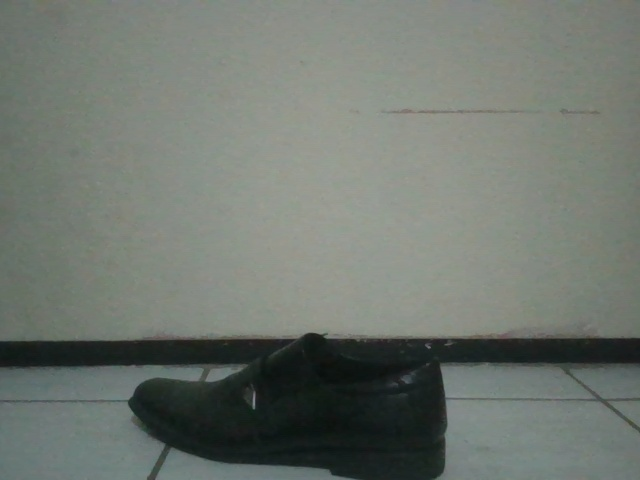

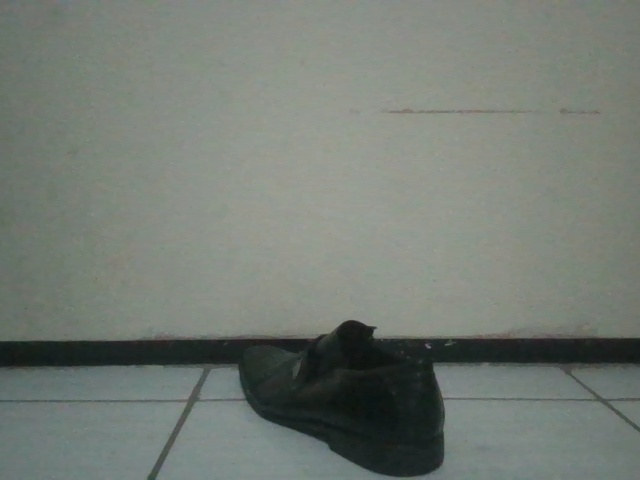

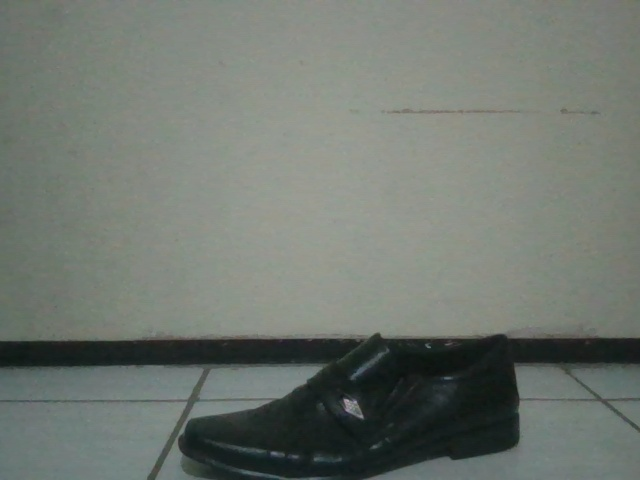

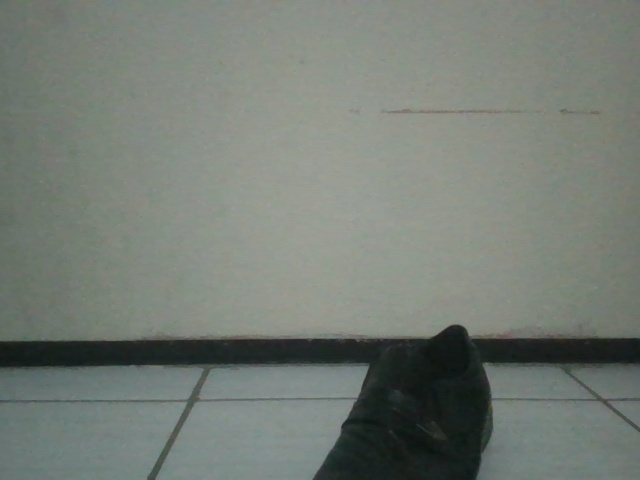

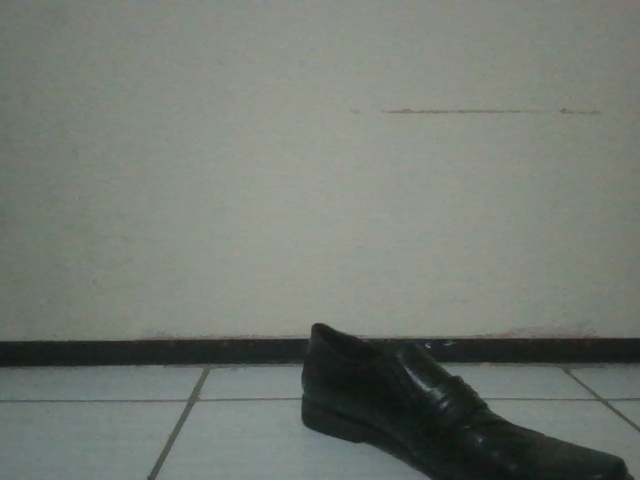

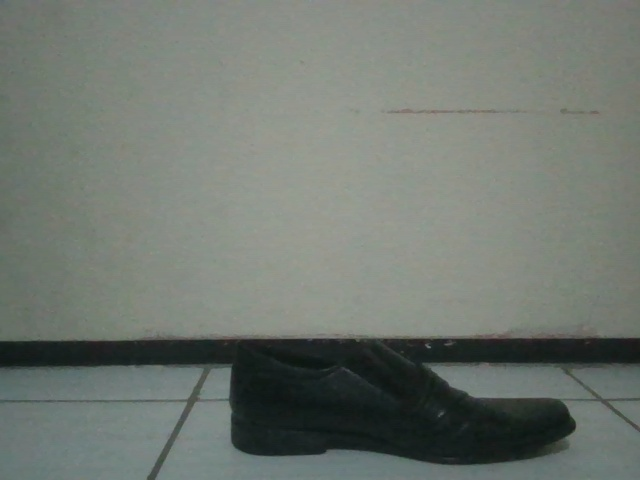

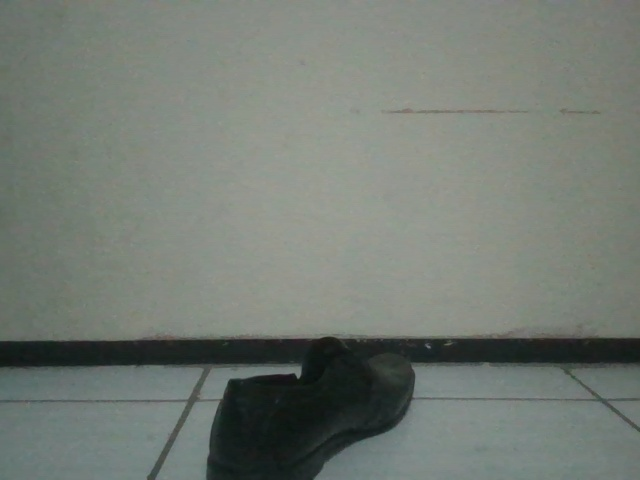

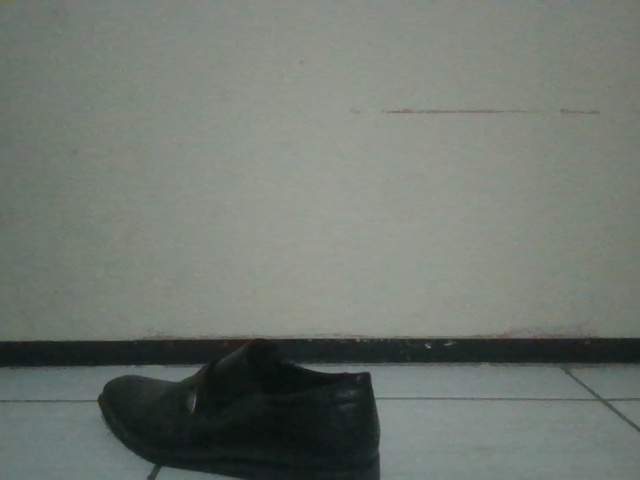

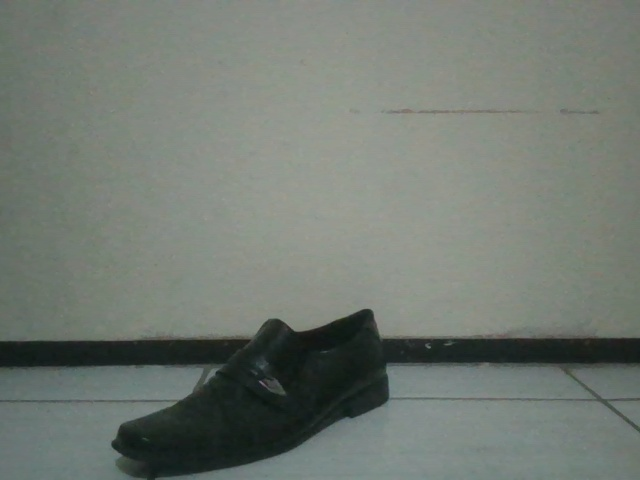

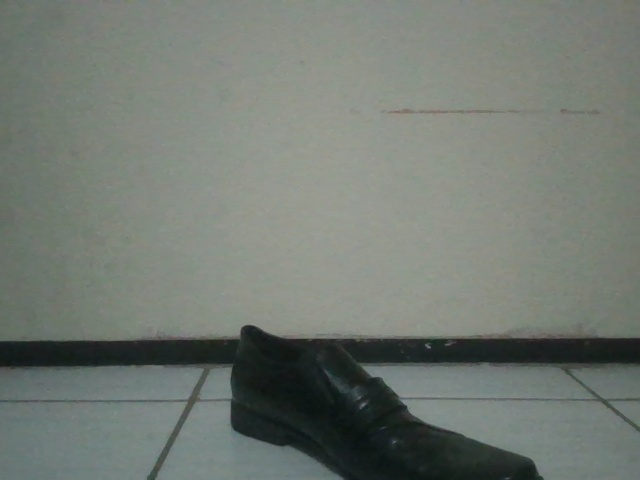

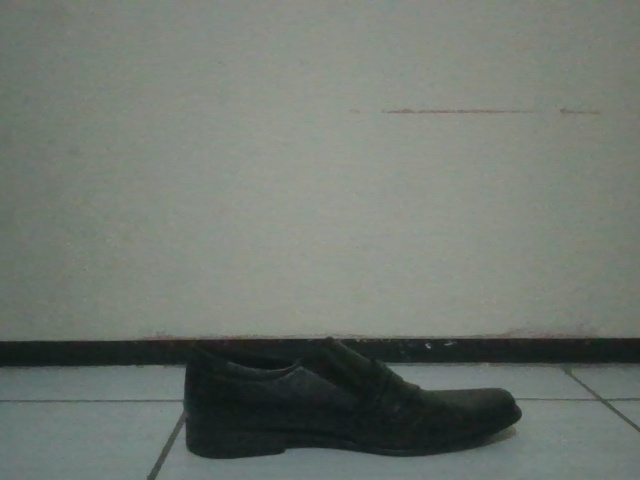

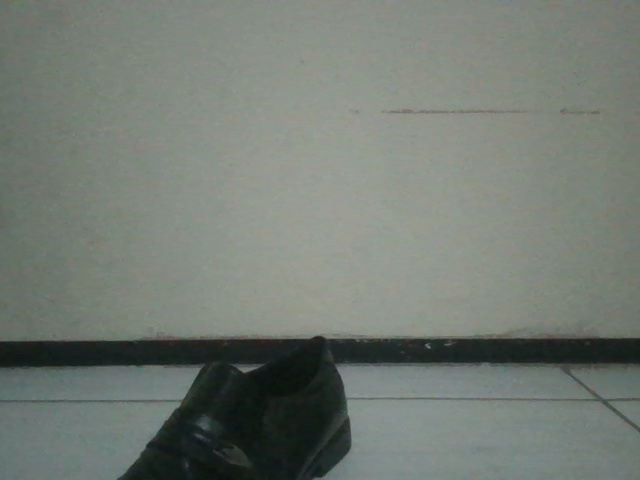

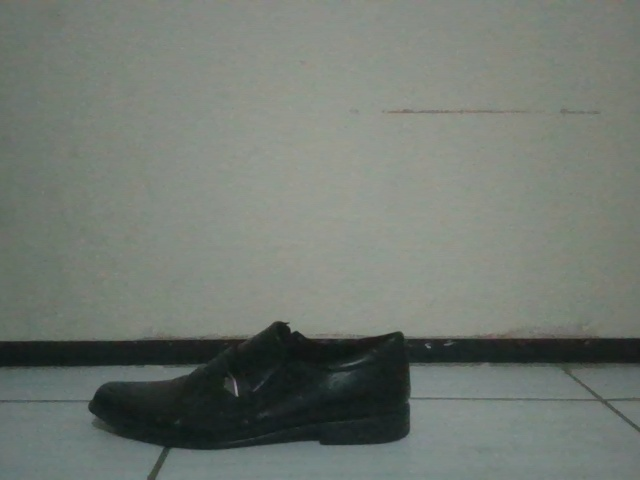

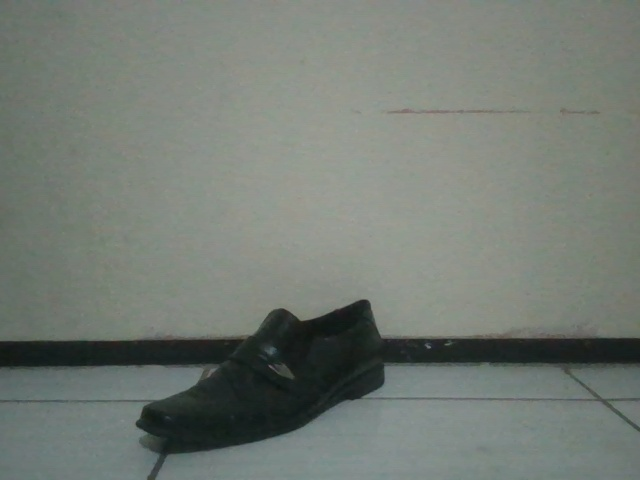

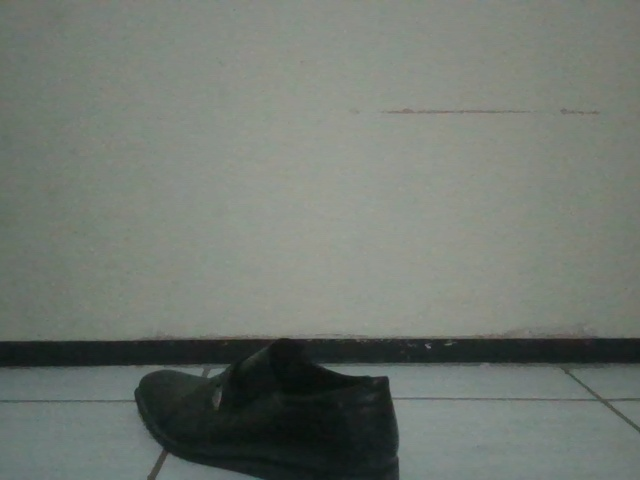

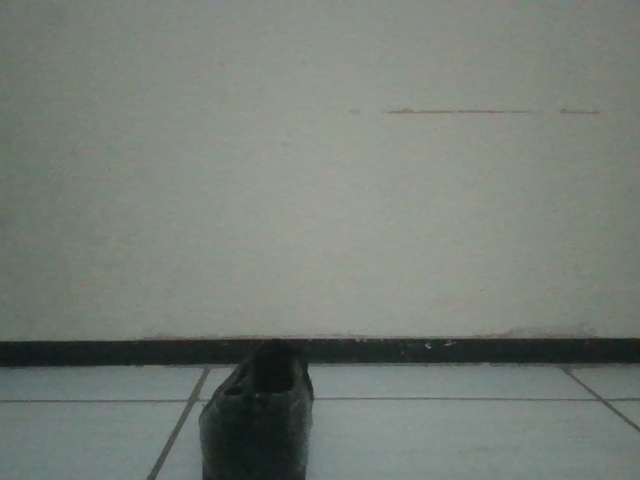

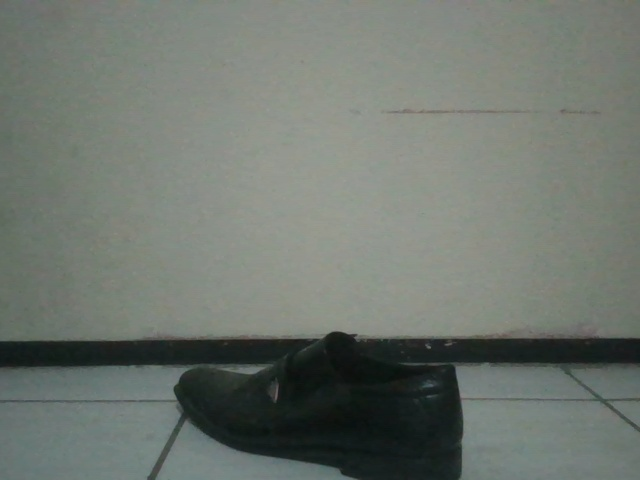

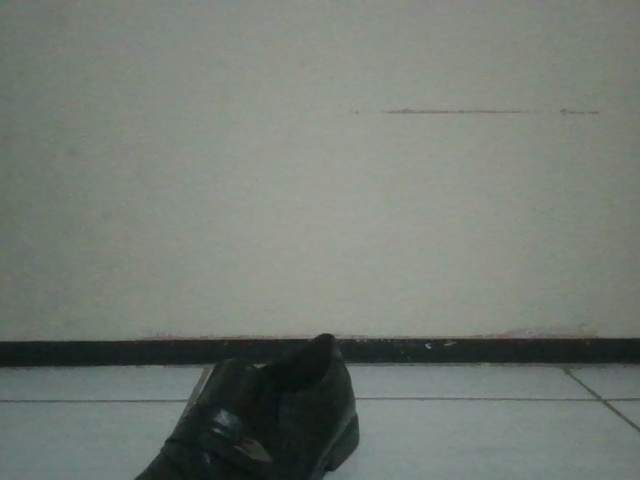

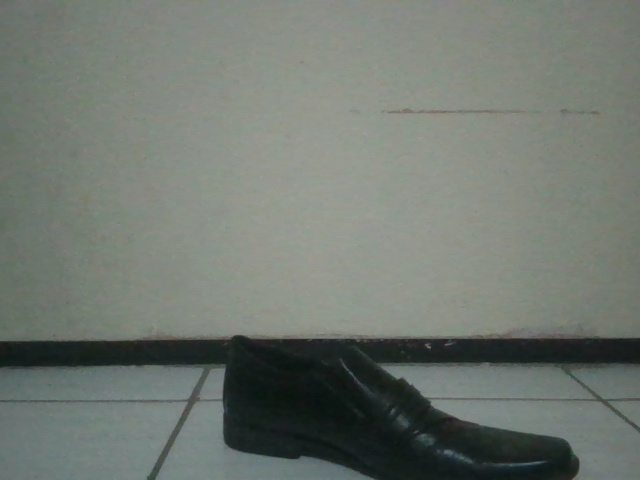

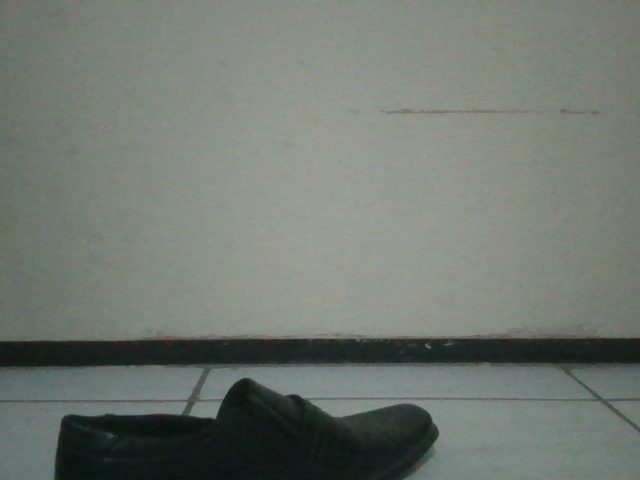

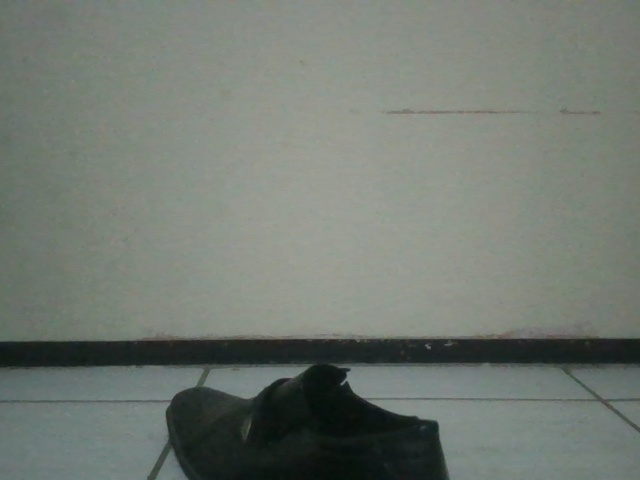

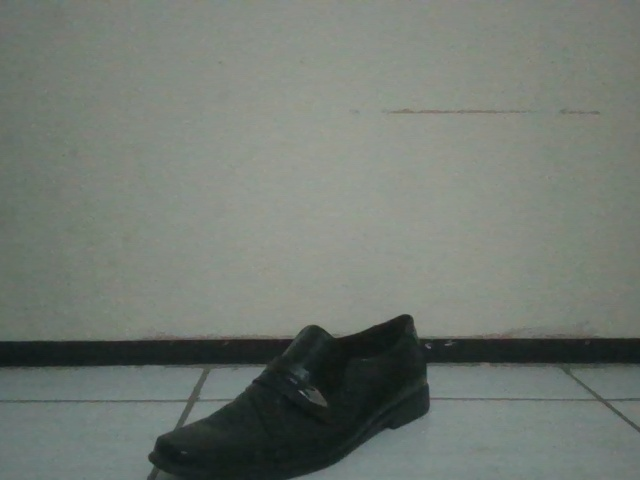

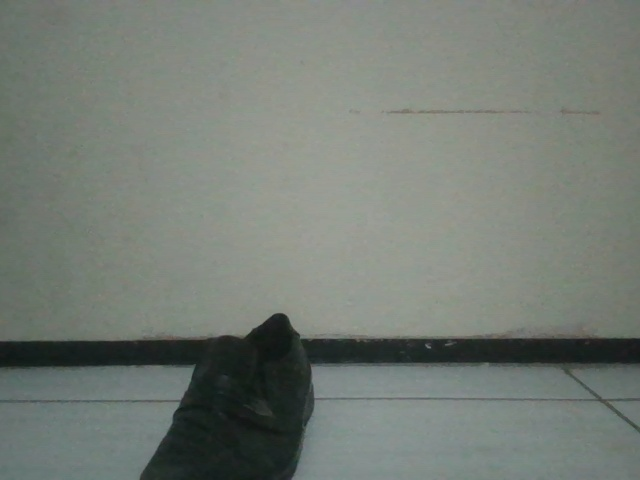

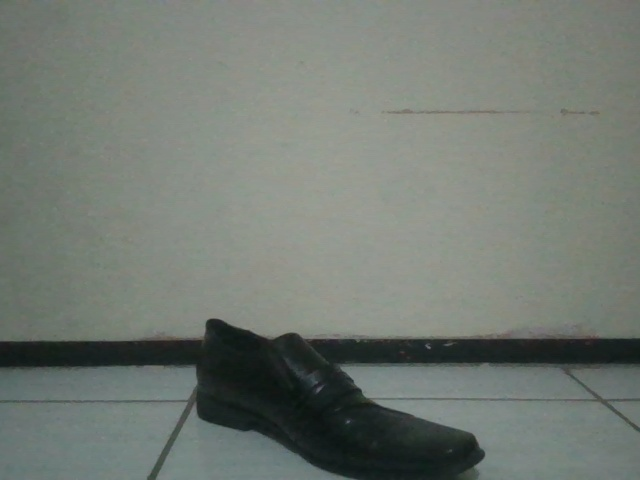

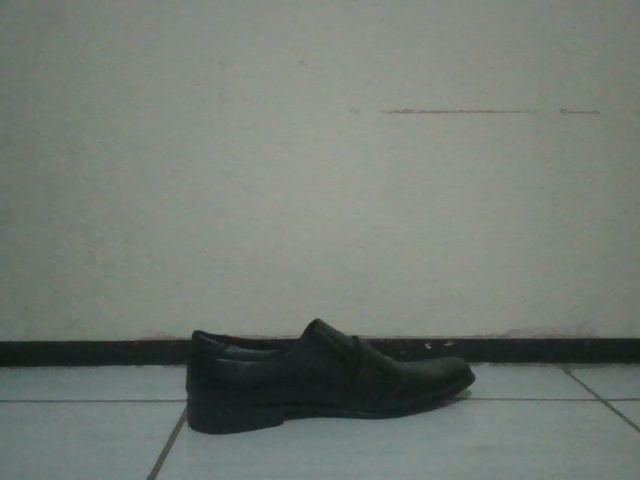

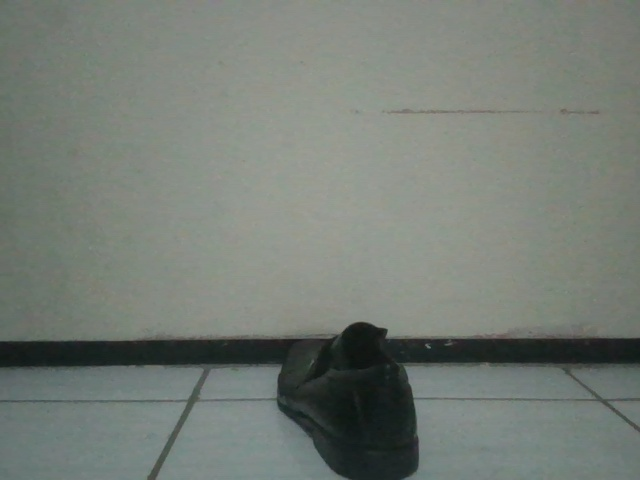

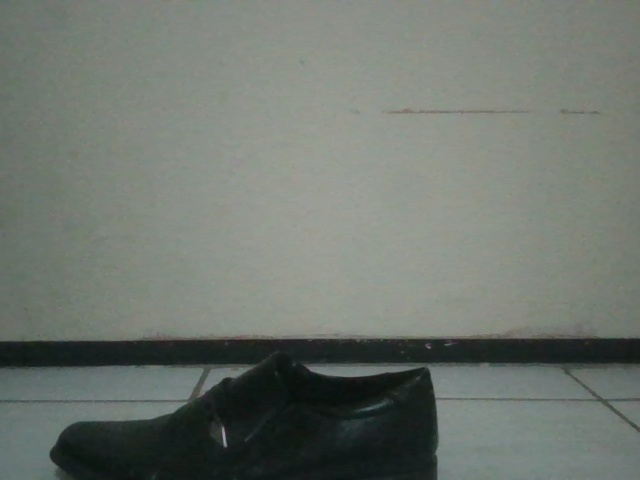

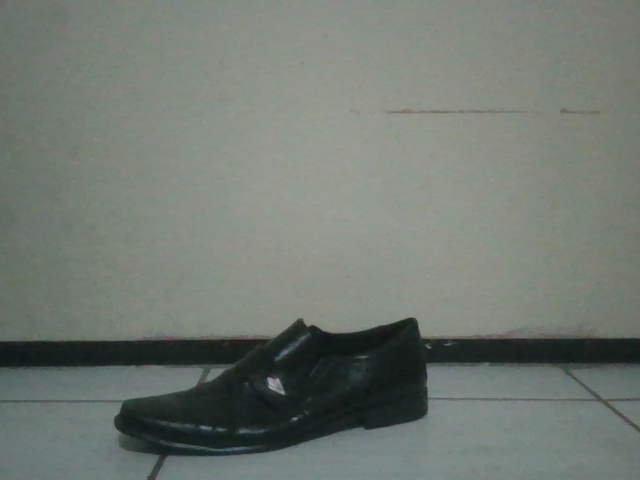

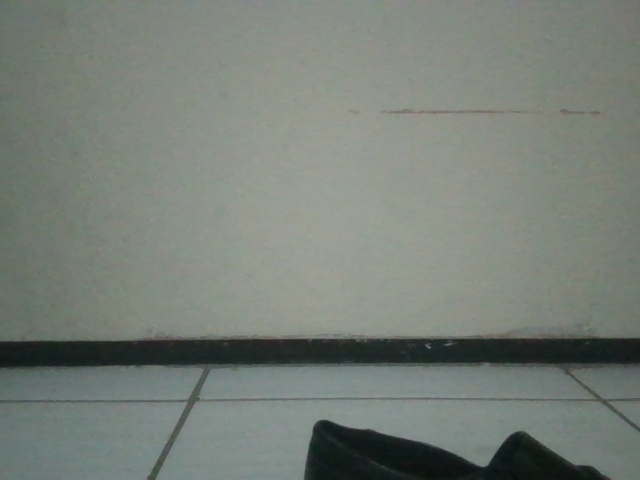

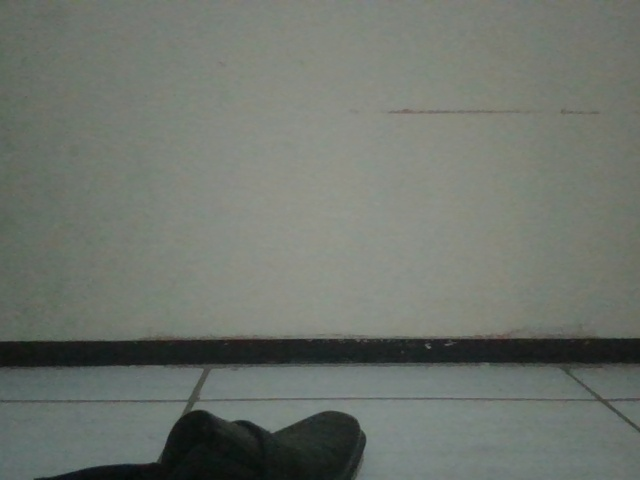

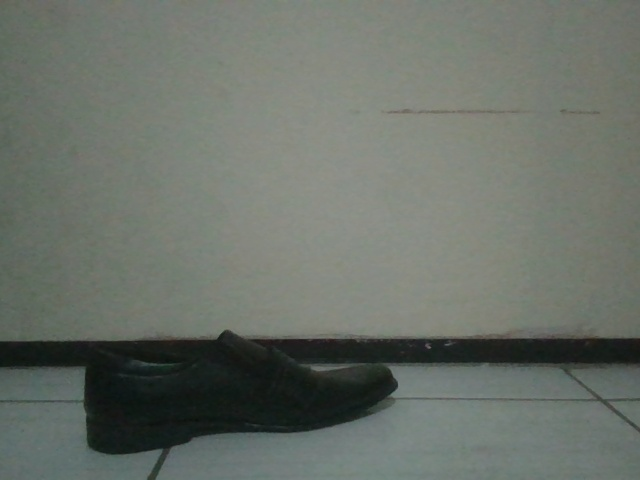

In [12]:
import cv2
import os
from datetime import datetime
from IPython.display import display, Image
import time

# Function to create the directory structure if it doesn't exist
def create_directory_structure(shoe_name):
    directory = os.path.join("..", "data", "raw_image", shoe_name)
    os.makedirs(directory, exist_ok=True)
    return directory

# Function to capture and save a frame
def capture_and_save_frame(shoe_name):
    # Open a connection to the camera (0 is usually the default camera)
    cap = cv2.VideoCapture(0)

    # Check if the camera is opened successfully
    if not cap.isOpened():
        print("Error: Could not open camera.")
        return

    # Capture a frame
    ret, frame = cap.read()

    # Generate a unique filename based on the current timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Create the directory structure
    output_directory = create_directory_structure(shoe_name)
    
    # Create the full path for the image file
    filename = os.path.join(output_directory, f"{timestamp}.jpg")

    # Save the frame to the specified file
    cv2.imwrite(filename, frame)

    # Release the camera
    cap.release()

    return filename

# Function to display the captured image
def display_image(filename):
    img = Image(filename=filename)
    display(img)
total = 0
# Main loop to capture and save frames every 10 seconds
try:
    shoe_name_input = input("Enter the shoe name: ")

    while True:
        filename = capture_and_save_frame(shoe_name_input)
        total += 1
        if total == 50: 
            break
        display_image(filename)
        time.sleep(4)

except KeyboardInterrupt:
    print("Capture stopped by the user.")
finally:
    # Clean up resources
    cv2.destroyAllWindows()

In [13]:
# After that remove the images that are not good enough